# **Notebook contents:**

Solving the same grid problem with **Temporal differnce method.**

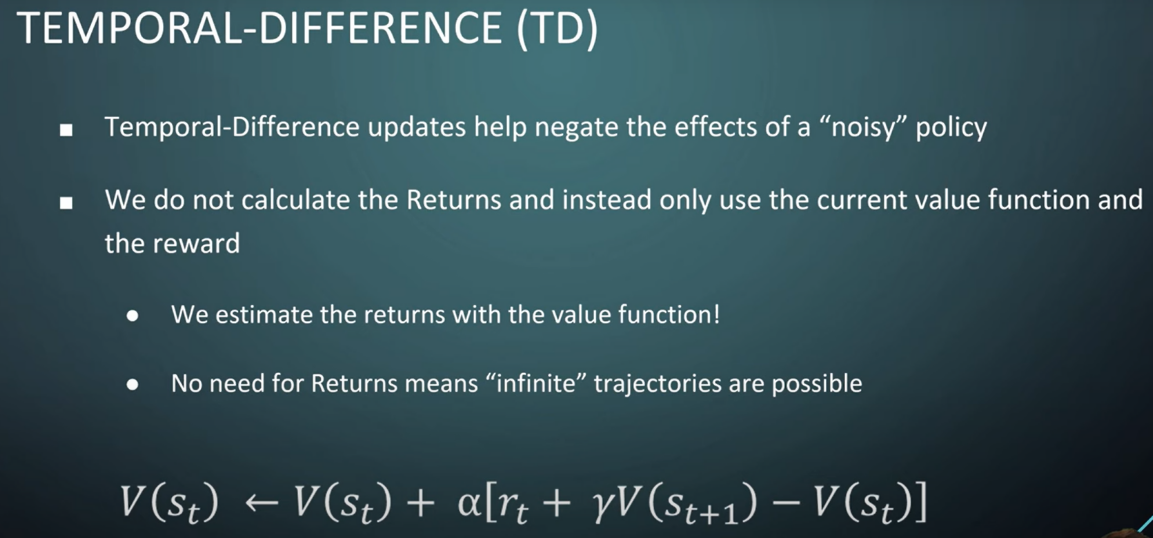

Here, α (learning rate) controls how much the new information influences the state value, reducing the impact of noisy or extreme returns. Instead of using an actual returns values, we use estimated value function of the future states.


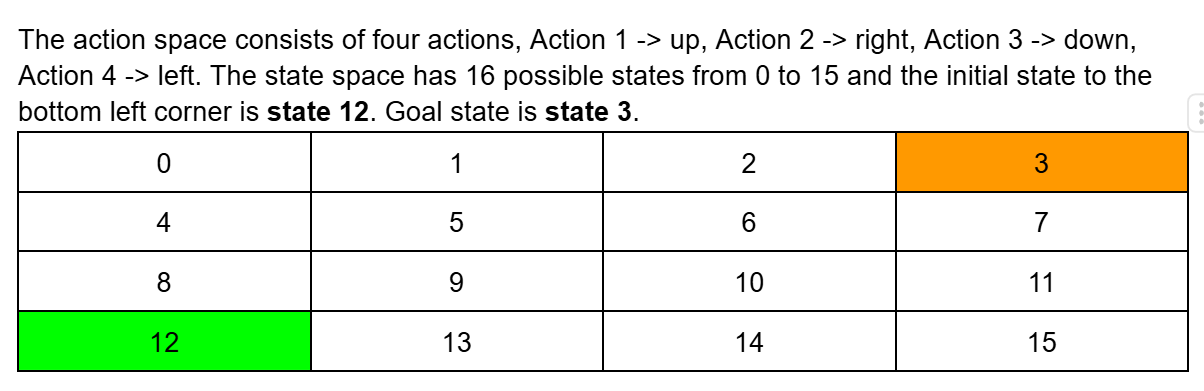

* State 12 is the initial state.
* State 3 is the goal state or the reward state.


# 1 Define the Environment

Our first job is to design the environment or in other words, define the reward function according to the problem we are trying to solve.

# PROBLEM 1: TO GET TO THE GOAL STATE FROM THE INITIAL STATE

## Imports

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Reward function definition

In [7]:
rewards = np.zeros(16)
rewards[3] = 1
# rewards[2] = 0
# rewards[11] = 0
# rewards[10] = 0 # This commented code is doing nothing at the moment
# Later we use things like this to set some advantages and disadvantages to the said grid cell

terminal_state = 3
state_values = np.zeros(16)
# alpha = 0.005
alpha = 0.02 # Our alpha value in this notebook is a lot larger than before, as we can see that the values in this new method are less noisy
# So, it would be good to affected by it a little more than the previous algorithm - > Monte carlo
score_log = []

In [8]:
rewards

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

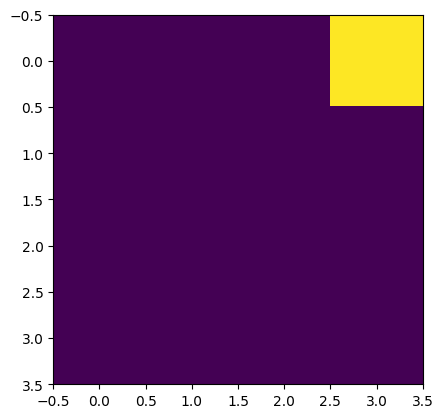

In [9]:
plt.imshow(rewards.reshape(4,4))

## State transition table

The following is our state transition table. We have 16 possible states in total from 0 to 15 and this table respresents how all the possible actions ie., Four actions 1 -> up, 2 -> right, 3 -> down, 4-> left affect the state transitions.

In [10]:
file_path = "/content/drive/MyDrive/Colab_Notebooks/Reinforcement_Learning_notebooks/Grid_world_example/state_transitions.csv"
state_transition_table = np.genfromtxt(file_path, delimiter=",").astype(int)

In [11]:
state_transition_table

array([[ 0,  1,  4,  0],
       [ 1,  2,  5,  0],
       [ 2,  3,  6,  1],
       [ 3,  3,  7,  2],
       [ 0,  5,  8,  4],
       [ 1,  6,  9,  4],
       [ 2,  7, 10,  5],
       [ 3,  7, 11,  6],
       [ 4,  9, 12,  8],
       [ 5, 10, 13,  8],
       [ 6, 11, 14,  9],
       [ 7, 11, 15, 10],
       [ 8, 13, 12, 12],
       [ 9, 14, 13, 12],
       [10, 15, 14, 13],
       [11, 15, 15, 14]])

In [12]:
state_transition_table[0]

array([0, 1, 4, 0])

## Estimating the returns using future state values.

We can see that in time-difference method, we don't need to compute the discounted rewards at all as we will not need all the returns of the entire trajectory.

This method involves taking state values from the future time steps and estimating values close to the average return values from the future time step.

In [13]:
def TD_update(next_val, values, rewards, states): # Takes in next value from the future time step, current values, rewards and states of current trajectory as arguments
    gamma = 0.9
    next_val = next_val
    #fixed bug in code here
    new_values = np.zeros(16) + values # Making a copy of the current values
    for i in reversed(range(len(rewards))): # From last reward to the first reward
        new_values[states[i]] = values[states[i]] + alpha * (rewards[i] + gamma * next_val - values[states[i]]) # Only changing the values corresponding to the current trajectory
        next_val = values[states[i]]
    return new_values

## Test agent (single trajectory)

test_agent() describes a single trajectory that happens during test time.

The entire work flow would be:
1. Have a reward function
2. Training: Set multiple trajectories and give returns values to every single trajectory. Also assign values to states based on the average values of rewards in each trajectory.
3. Test time: Now, we have values of all the states and we just traverse our test agent by selecting the next state with the highest value from the state transition matrix.

In [14]:
def test_agent():
    state = 12 #  Starting with Initial state
    done = False
    steps = 0
    total_rewards = 0
    states_log = []
    while (not(state == terminal_state)) and steps<30:
        states_log.append(state) # log the current state
        action = np.argmax(state_values[state_transition_table[state]]) # Choose the action that gets us into the state with highest value
        state = state_transition_table[state, action] # Updating state based on the action taken
        total_rewards += rewards[state]
        steps += 1
    states_log.append(state)
    return total_rewards, states_log # returns total rewards collected along the trajectory and a log of states and their transitions

## Training loop over multiple trajectories

We get returns grids for every single trajectory. A return grid is nothing but the return value of every cell in one trajectory. If we haven't touched that particular cell in the trajectory, the return grid's corresponding value to the respective cell would be 0.

In [16]:
number_of_trajectories = 1000
for _ in range(number_of_trajectories):
    state = 12 # Starting with the initial state
    state_log = [] # Initializing the state_log and reward_log values for the current trajectory
    reward_log = []
    steps = 0

    # This while logic to finish the current trajectory from the initial position to the goal state
    while (not(state == terminal_state)) and steps<40:
        reward_log.append(rewards[state])
        state_log.append(state)

        action = random.randint(0,3) # Taking a random action among the four possible ones
        state = state_transition_table[state, action] # And going to the next state on the basis of the action taken
        steps += 1

    # For the current trajectory, we have the rewardslog and states log values.
    # We are creating a return grid by using the cumulative discounted rewards function we have previously defined.
    reward_log.append(rewards[state])
    state_log.append(state)

    next_val = 0 # After, we reach the terminal state, we are making the next_val as 0

    # We don't need returns_log anymore
    # Let us directly update state values
    state_values = TD_update(next_val, state_values, reward_log, state_log)

    # Once, we get the returns_log of our current trajectory, we update the value-look up table by taking the average of current trajectory and previous ones.

    score_log.append(test_agent()[0]) # score is the reward that the test agent gets in the trajectory, which is nothing but cumulative rewards across the trajectory.

In [17]:
state_log # These are the state values at the respective time steps in the final trajectory

[12,
 12,
 12,
 12,
 13,
 12,
 12,
 12,
 13,
 12,
 12,
 12,
 12,
 12,
 8,
 12,
 12,
 12,
 12,
 8,
 8,
 4,
 8,
 12,
 12,
 13,
 9,
 13,
 12,
 12,
 13,
 9,
 5,
 1,
 0,
 1,
 5,
 4,
 5,
 6,
 7]

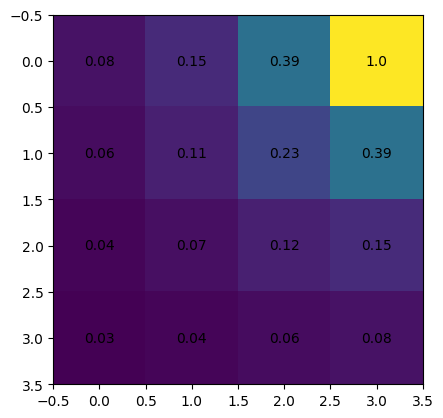

In [18]:
fig1, ax1= plt.subplots(1)
ax1.imshow(state_values.reshape(4, 4))

for (j,i), label in np.ndenumerate(state_values.reshape(4, 4).round(2)):
    ax1.text(i,j,label,ha='center',va='center')

We can observe that the states closer to the goal state have higher values and the states farther away have lower values.

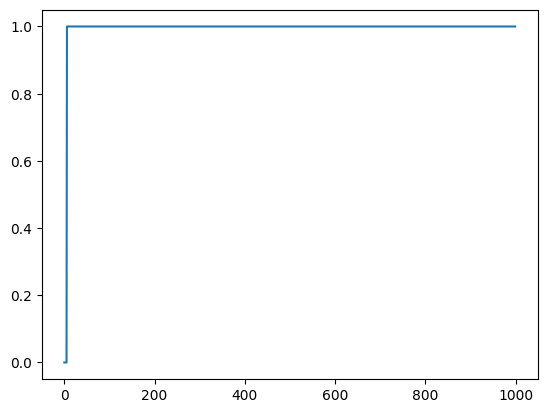

In [19]:
plt.plot(score_log)

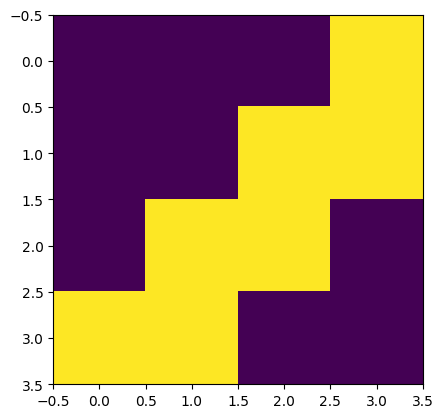

In [20]:
_, state_log = test_agent() # state_log stores the states visited by the test_agent()
state_view = np.zeros(16) # Initializing a state_view array to view the states visited by the test agent
state_view[state_log] = 1 # Setting the value of the states visited by the test agent as 1
plt.imshow(state_view.reshape(4,4))

In [21]:
state_transition_table[12]

array([ 8, 13, 12, 12])

In [22]:
state_values[state_transition_table[12]]
# Values of the four states, we have assigned from the returns_log array collected over multiple trajectories

array([0.0408346 , 0.04254928, 0.02912727, 0.02912727])

We can see that we converge very quickly and get the best score. So, let us make the environment a little harder by including some prizes and problems along the way.

# PROBLEM 2: GETTING TO THE GOAL STATE FROM THE INITIAL STATE BY AVOIDING PROBLEMS ALONG THE PATH

We are making the rewards of certain grid cells negative to establish that the agent gets penalized to go into those grid cells and it should avoid them.

## Reward function definition

In [24]:
rewards = np.zeros(16)
rewards[3] = 10 # HIGH POSITIVE REWARD
rewards[2] = -1 # NEGATIVE REWARDS
rewards[11] = -1
rewards[10] = -1


terminal_state = 3
state_values = np.zeros(16)

# alpha = 0.005
alpha = 0.02 # Our alpha value in this notebook is a lot larger than before, as we can see that the values in this new method are less noisy
# So, it would be good to affected by it a little more than the previous algorithm - > Monte carlo

score_log = []

In [25]:
rewards

array([ 0.,  0., -1., 10.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,
        0.,  0.,  0.])

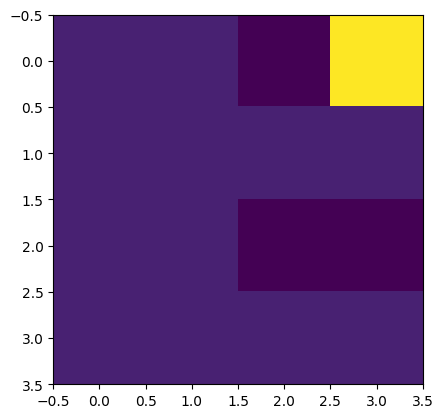

In [26]:
plt.imshow(rewards.reshape(4,4))

## State transition table

The following is our state transition table. We have 16 possible states in total from 0 to 15 and this table respresents how all the possible actions ie., Four actions 1 -> up, 2 -> right, 3 -> down, 4-> left affect the state transitions.

In [27]:
file_path = "/content/drive/MyDrive/Colab_Notebooks/Reinforcement_Learning_notebooks/Grid_world_example/state_transitions.csv"
state_transition_table = np.genfromtxt(file_path, delimiter=",").astype(int)

In [28]:
state_transition_table

array([[ 0,  1,  4,  0],
       [ 1,  2,  5,  0],
       [ 2,  3,  6,  1],
       [ 3,  3,  7,  2],
       [ 0,  5,  8,  4],
       [ 1,  6,  9,  4],
       [ 2,  7, 10,  5],
       [ 3,  7, 11,  6],
       [ 4,  9, 12,  8],
       [ 5, 10, 13,  8],
       [ 6, 11, 14,  9],
       [ 7, 11, 15, 10],
       [ 8, 13, 12, 12],
       [ 9, 14, 13, 12],
       [10, 15, 14, 13],
       [11, 15, 15, 14]])

In [29]:
state_transition_table[0]

array([0, 1, 4, 0])

## Estimating the returns using future state values.

We can see that in time-difference method, we don't need to compute the discounted rewards at all as we will not need all the returns of the entire trajectory.

This method involves taking state values from the future time steps and estimating values close to the average return values from the future time step.

In [30]:
def TD_update(next_val, values, rewards, states): # Takes in next value from the future time step, current values, rewards and states of current trajectory as arguments
    gamma = 0.9
    next_val = next_val
    #fixed bug in code here
    new_values = np.zeros(16) + values # Making a copy of the current values
    for i in reversed(range(len(rewards))): # From last reward to the first reward
        new_values[states[i]] = values[states[i]] + alpha * (rewards[i] + gamma * next_val - values[states[i]]) # Only changing the values corresponding to the current trajectory
        next_val = values[states[i]]
    return new_values

## Test agent (single trajectory)

test_agent() describes a single trajectory that happens during test time.

The entire work flow would be:
1. Have a reward function
2. Training: Set multiple trajectories and give returns values to every single trajectory. Also assign values to states based on the average values of rewards in each trajectory.
3. Test time: Now, we have values of all the states and we just traverse our test agent by selecting the next state with the highest value from the state transition matrix.

In [31]:
def test_agent():
    state = 12 #  Starting with Initial state
    done = False
    steps = 0
    total_rewards = 0
    states_log = []
    while (not(state == terminal_state)) and steps<30:
        states_log.append(state) # log the current state
        action = np.argmax(state_values[state_transition_table[state]]) # Choose the action that gets us into the state with highest value
        state = state_transition_table[state, action] # Updating state based on the action taken
        total_rewards += rewards[state]
        steps += 1
    states_log.append(state)
    return total_rewards, states_log # returns total rewards collected along the trajectory and a log of states and their transitions

## Training loop over multiple trajectories

We get returns grids for every single trajectory. A return grid is nothing but the return value of every cell in one trajectory. If we haven't touched that particular cell in the trajectory, the return grid's corresponding value to the respective cell would be 0.

In [32]:
number_of_trajectories = 1000
for _ in range(number_of_trajectories):
    state = 12 # Starting with the initial state
    state_log = [] # Initializing the state_log and reward_log values for the current trajectory
    reward_log = []
    steps = 0

    # This while logic to finish the current trajectory from the initial position to the goal state
    while (not(state == terminal_state)) and steps<40:
        reward_log.append(rewards[state])
        state_log.append(state)

        action = random.randint(0,3) # Taking a random action among the four possible ones
        state = state_transition_table[state, action] # And going to the next state on the basis of the action taken
        steps += 1

    # For the current trajectory, we have the rewardslog and states log values.
    # We are creating a return grid by using the cumulative discounted rewards function we have previously defined.
    reward_log.append(rewards[state])
    state_log.append(state)

    next_val = 0 # After, we reach the terminal state, we are making the next_val as 0

    # We don't need returns_log anymore
    # Let us directly update state values
    state_values = TD_update(next_val, state_values, reward_log, state_log)

    # Once, we get the returns_log of our current trajectory, we update the value-look up table by taking the average of current trajectory and previous ones.

    score_log.append(test_agent()[0]) # score is the reward that the test agent gets in the trajectory, which is nothing but cumulative rewards across the trajectory.

In [33]:
state_log # These are the state values at the respective time steps in the final trajectory

[12,
 12,
 12,
 12,
 8,
 4,
 0,
 4,
 0,
 4,
 4,
 5,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 8,
 4,
 5,
 9,
 8,
 9,
 5,
 6,
 2,
 3]

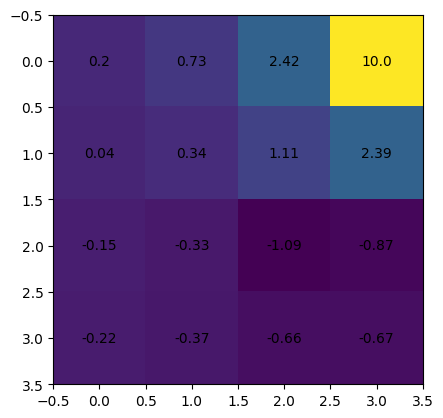

In [34]:
fig1, ax1= plt.subplots(1)
ax1.imshow(state_values.reshape(4, 4))

for (j,i), label in np.ndenumerate(state_values.reshape(4, 4).round(2)):
    ax1.text(i,j,label,ha='center',va='center')

We can observe that the states closer to the goal state have higher values and the states farther away have lower values.

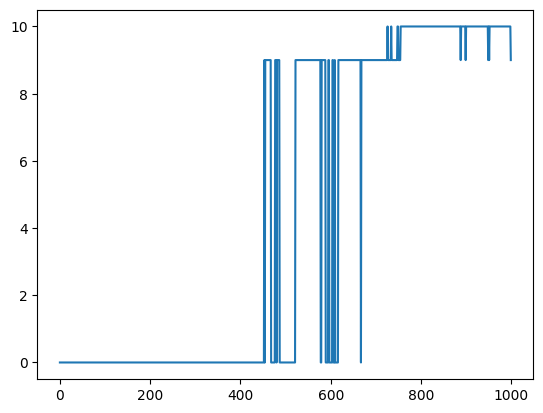

In [35]:
plt.plot(score_log)

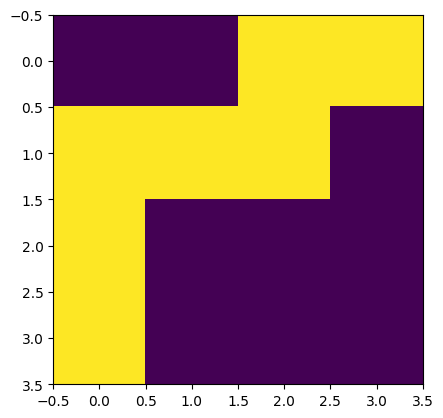

In [36]:
_, state_log = test_agent() # state_log stores the states visited by the test_agent()
state_view = np.zeros(16) # Initializing a state_view array to view the states visited by the test agent
state_view[state_log] = 1 # Setting the value of the states visited by the test agent as 1
plt.imshow(state_view.reshape(4,4))

In [37]:
state_transition_table[12]

array([ 8, 13, 12, 12])

In [38]:
state_values[state_transition_table[12]]
# Values of the four states, we have assigned from the returns_log array collected over multiple trajectories

array([-0.15491621, -0.37130193, -0.22363736, -0.22363736])

Now, in problem 2, we can see that, with negative rewards it took a little longer for the agent to find the optimal trajectory in a harder environment.